<a href="https://colab.research.google.com/github/janswit/made_basket_yolo/blob/main/projekt_basket_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import cv2
import json
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/project_basket'

preprocess_jumpshot = os.path.join(base_dir, 'preprocess/jumpshot/')
preprocess_layup = os.path.join(base_dir, 'preprocess/layup/')
preprocess_blacked_out_and_json = os.path.join(base_dir, 'preprocess/blacked_out_and_json/' )
preprocess_json_renamed = os.path.join(base_dir, 'preprocess/json_renamed/')

pretraining = os.path.join(base_dir, 'pretraining/')

train_images = os.path.join(base_dir, 'dataset/images/train')
train_labels = os.path.join(base_dir, 'dataset/labels/train')

test_images = os.path.join(base_dir, 'dataset/images/test')
test_labels = os.path.join(base_dir, 'dataset/labels/test')

validation_images = os.path.join(base_dir, 'dataset/images/validation')
validation_labels = os.path.join(base_dir, 'dataset/labels/validation')

In [ ]:
directories = [preprocess_jumpshot, preprocess_layup, preprocess_blacked_out_and_json,
               train_images, train_labels, test_images, test_labels, validation_images, validation_labels,
               pretraining]

for directory in directories:
  print(f'{directory} has: {len(os.listdir(directory))} items')

/content/drive/MyDrive/project_basket/preprocess/jumpshot/ has: 0 items
/content/drive/MyDrive/project_basket/preprocess/layup/ has: 0 items
/content/drive/MyDrive/project_basket/preprocess/blacked_out_and_json/ has: 54 items
/content/drive/MyDrive/project_basket/dataset/images/train has: 1302 items
/content/drive/MyDrive/project_basket/dataset/labels/train has: 1302 items
/content/drive/MyDrive/project_basket/dataset/images/test has: 218 items
/content/drive/MyDrive/project_basket/dataset/labels/test has: 218 items
/content/drive/MyDrive/project_basket/dataset/images/validation has: 226 items
/content/drive/MyDrive/project_basket/dataset/labels/validation has: 226 items
/content/drive/MyDrive/project_basket/pretraining/ has: 0 items


In [ ]:
def count_matching_files(dir1, dir2):
    files1 = set(os.listdir(dir1))
    files2 = set(os.listdir(dir2))
    matching_files = files1.intersection(files2)
    return len(matching_files)

The number of files with the same names in the two directories: 208


# Rectangle blackout

In [ ]:
def get_file_paths(directory):
  mov_file_paths = []
  annotation_file_paths = []

  for filename in os.listdir(directory):
      if filename.endswith('.mov'):
        video_path = os.path.join(directory, filename)
        mov_file_paths.append(video_path)
      elif filename.endswith('.json'):
        annotation_path = os.path.join(directory, filename)
        annotation_file_paths.append(annotation_path)

  return mov_file_paths, annotation_file_paths

In [ ]:
def get_file_name(directory):
  file_names = os.listdir(directory)
  video_name_list = []
  json_name_list = []

  for file_name in file_names:
    if file_name.endswith('.mov'):
      video_name_list.append(file_name)
    elif file_name.endswith('.json'):
      json_name_list.append(file_name)

  return video_name_list, json_name_list

In [ ]:
def black_out_rectangle(video_path, output_path, x=1507, y=0, width=371, height=244):

    video = cv2.VideoCapture(video_path)
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    output = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

    while video.isOpened():
      ret, frame = video.read()
      if not ret:
        break

      mask = cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 0, 0), -1)
      frame = cv2.bitwise_and(frame, mask)
      output.write(frame)

    video.release()
    output.release()
    cv2.destroyAllWindows()

In [ ]:
def black_out_files(directory, output_directory):

    video_file_names, _ = get_file_name(directory)
    count = 1
    len_list = len(video_file_names)

    for video_file_name in video_file_names:
        video_path = os.path.join(directory, video_file_name)
        output_path = os.path.join(output_directory, video_file_name)
        black_out_rectangle(video_path, output_path)
        print(f'{video_file_name} is being processed. {count}/{len_list}')
        count += 1
    print(f'All {count-1} videos have been processed.')


In [ ]:
black_out_files(preprocess_jumpshot, preprocess_blacked_out_and_json)

HomeCourt_07A3E810-CF48-430A-A111-9625F4D35DFB.mov is being processed. 1/27
HomeCourt_6CFF51FA-6CDF-4C42-8D19-DCE49D087DAE.mov is being processed. 2/27
HomeCourt_1F89D499-83CC-448E-B710-3B545433FBAB.mov is being processed. 3/27
HomeCourt_0AA8B31E-C893-4FAF-A722-CB770545A0B2.mov is being processed. 4/27
HomeCourt_42E24726-1CA1-4D42-9005-845E4F386DFE.mov is being processed. 5/27
HomeCourt_48E92CFB-112D-4E3D-A521-BE492FF1F832.mov is being processed. 6/27
HomeCourt_34E90E0C-8A4C-4C25-9EEB-1B696AE6A738.mov is being processed. 7/27
HomeCourt_7EC4D5B9-6B7C-466C-A5EC-57C240E00053.mov is being processed. 8/27
HomeCourt_24EEBA17-F4BC-4FEE-BDCB-FEDCC865D331.mov is being processed. 9/27
HomeCourt_8BBC5D0B-01B7-4738-9F2B-49808A9CB8B8.mov is being processed. 10/27
HomeCourt_20F4B1B2-343C-4382-8716-21E2F8A73F59.mov is being processed. 11/27
HomeCourt_531D7BB4-728B-4FE8-A469-083D4D6FF5CB.mov is being processed. 12/27
HomeCourt_306CFEE4-09CF-447A-BE81-A6580CDAE71E.mov is being processed. 13/27
HomeCour

# Rename json files


In [ ]:
def rename_json_files(directory, new_directory):
    pattern = r'(?<=_)(HomeCourt_[0-9A-Za-z-]+)'

    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            print(f"Processing file: {filename}")
            match = re.search(pattern, filename)
            if match:
                new_filename = match.group(1) + '.json'

                old_file_path = os.path.join(directory, filename)
                new_file_path = os.path.join(new_directory, new_filename)

                os.rename(old_file_path, new_file_path)
                print(f"File processed and saved as: {new_filename}")

In [ ]:
rename_json_files(preprocess_jumpshot, preprocess_blacked_out_and_json)

Processing file: p1_ds0_004_HomeCourt_E64D631E-2D5E-4E6D-93A6-9910973F81F7.mp4.json
File processed and saved as: HomeCourt_E64D631E-2D5E-4E6D-93A6-9910973F81F7.json
Processing file: p1_ds0_004_HomeCourt_CDB3465D-0EC0-4276-985A-54BB52B42D01.mp4.json
File processed and saved as: HomeCourt_CDB3465D-0EC0-4276-985A-54BB52B42D01.json
Processing file: p1_ds0_004_HomeCourt_BF658B11-0BFF-444F-BC16-64F015F5D76B.mp4.json
File processed and saved as: HomeCourt_BF658B11-0BFF-444F-BC16-64F015F5D76B.json
Processing file: p1_ds0_004_HomeCourt_BD6DD185-C299-4DE4-B4C8-0F6399693B48.mp4.json
File processed and saved as: HomeCourt_BD6DD185-C299-4DE4-B4C8-0F6399693B48.json
Processing file: p1_ds0_004_HomeCourt_BC7CA937-EA96-4BCC-BA6E-A1073E34030A.mp4.json
File processed and saved as: HomeCourt_BC7CA937-EA96-4BCC-BA6E-A1073E34030A.json
Processing file: p1_ds0_004_HomeCourt_BC8DF9C1-E0C7-44AF-AD73-DEBF2992F5C5.mp4.json
File processed and saved as: HomeCourt_BC8DF9C1-E0C7-44AF-AD73-DEBF2992F5C5.json
Processing

# Json to yolo format in .txt


In [ ]:
def get_file_name(directory):
  file_names = os.listdir(directory)
  video_name_list = []
  json_name_list = []

  for file_name in file_names:
    if file_name.endswith('.mov'):
      video_name_list.append(file_name)
    elif file_name.endswith('.json'):
      json_name_list.append(file_name)

  return video_name_list, json_name_list

In [ ]:
def get_class_id(annotation_file):
  class_dict = {}

  for n in range(len(annotation_file['objects'])):
    class_id = annotation_file['objects'][n]['id']
    class_title = annotation_file['objects'][n]['classTitle']
    if class_title == 'jumpShot':
      class_label = 0
      class_dict[class_id] = class_label
    elif class_title == 'madeBasket':
      class_label = 1
      class_dict[class_id] = class_label

  return class_dict

In [ ]:
def get_annotations(data):

  video_name = data['videoName']

  frame_list = []
  geometry_points_list = []
  object_id_list = []

  for frame in data['frames']:

    frame_index = frame['index']
    geometry_points = frame['figures'][0]['geometry']['points']['exterior']
    object_id = frame['figures'][0]['objectId']

    frame_list.append(frame_index)
    geometry_points_list.append(geometry_points)
    object_id_list.append(object_id)

  return frame_list, geometry_points_list, object_id_list

In [ ]:
def yolo_coordinates(points, frame_width:int = 1920, frame_height:int = 1080):

  x = ((points[0][0] + points[1][0]) / 2)/ frame_width
  y = ((points[0][1] + points[1][1]) / 2) / frame_height
  w = abs((points[1][0] - points[0][0]) / frame_width)
  h = abs((points[1][1] - points[0][1]) / frame_height)

  center_x = round(x, 6)
  center_y = round(y, 6)
  width = round(w, 6)
  heigth = round(h, 6)

  return center_x, center_y, width, heigth

In [ ]:
def convert_json_to_yolo(json_directory, output_directory):
  _, json_names_list = get_file_name(json_directory)
  directory = output_directory

  for n in range(len(json_names_list)):

    with open(os.path.join(json_directory, json_names_list[n])) as file:
      print(f'Working on {json_names_list[n]}')
      data = json.load(file)

      frames, geometry_points, object_ids = get_annotations(data)
      class_dict = get_class_id(data)
      class_id_list = [class_dict[item] for item in object_ids]

      for i in range(len(frames)):
        file_name = json_names_list[n]
        filename_without_extension = file_name[:file_name.rfind(".json")]
        end_file_name =  f"{filename_without_extension}_{frames[i]}.txt"
        gp = geometry_points[i]
        class_label = class_id_list[i]
        center_X, center_Y, width, heigth = yolo_coordinates(gp)


        content = f'{class_label} {center_X} {center_Y} {width} {heigth}'
        file_path = directory + end_file_name
        with open(file_path, 'w') as file:
          file.write(content)


In [ ]:
convert_json_to_yolo(preprocess_blacked_out_and_json, pretraining)

Working on HomeCourt_E64D631E-2D5E-4E6D-93A6-9910973F81F7.json
Working on HomeCourt_CDB3465D-0EC0-4276-985A-54BB52B42D01.json
Working on HomeCourt_BF658B11-0BFF-444F-BC16-64F015F5D76B.json
Working on HomeCourt_BD6DD185-C299-4DE4-B4C8-0F6399693B48.json
Working on HomeCourt_BC7CA937-EA96-4BCC-BA6E-A1073E34030A.json
Working on HomeCourt_BC8DF9C1-E0C7-44AF-AD73-DEBF2992F5C5.json
Working on HomeCourt_BA8083B1-E63A-419A-A163-B19B77D9B30F.json
Working on HomeCourt_531D7BB4-728B-4FE8-A469-083D4D6FF5CB.json
Working on HomeCourt_91047B8E-F00D-4B8F-B2EB-F7A9221904AC.json
Working on HomeCourt_B8B94675-0FC5-491F-88D5-F5CB94F200B1.json
Working on HomeCourt_71C6640A-36C2-4C1F-84DD-8C03666A597F.json
Working on HomeCourt_59DE63D8-CEA3-477F-A08D-17FAAE37314B.json
Working on HomeCourt_42E24726-1CA1-4D42-9005-845E4F386DFE.json
Working on HomeCourt_8BBC5D0B-01B7-4738-9F2B-49808A9CB8B8.json
Working on HomeCourt_48E92CFB-112D-4E3D-A521-BE492FF1F832.json
Working on HomeCourt_34E90E0C-8A4C-4C25-9EEB-1B696AE6A7

# Video to image


In [ ]:
def video_to_frames(video_path, path_output_dir, frame_list, name):
    vidcap = cv2.VideoCapture(video_path)

    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
          count += 1
          if count in frame_list:
            frame_path = os.path.join(path_output_dir, f"{name}_{count}.jpg")
            cv2.imwrite(frame_path, image)
          else:
            continue
        else:
            break
    print(f'{name} succesfully processed')
    cv2.destroyAllWindows()
    vidcap.release()

In [ ]:
def process_videos(directory, output_dir):
    video_name_list, json_name_list = get_file_name(directory)

    video_name_list.sort()
    json_name_list.sort()

    for i in range(len(video_name_list)):
        video_name = video_name_list[i]
        json_name = json_name_list[i]

        video_file_path = os.path.join(directory, video_name)
        json_file_path = os.path.join(directory, json_name)

        with open(json_file_path) as file:
            print(f'Working on {json_name}')
            data = json.load(file)

        frames, _, _ = get_annotations(data)
        video_to_frames(video_file_path, output_dir, frames, video_name)


In [ ]:
process_videos(preprocess_blacked_out_and_json, pretraining)

Working on HomeCourt_07A3E810-CF48-430A-A111-9625F4D35DFB.json
HomeCourt_07A3E810-CF48-430A-A111-9625F4D35DFB.mov succesfully processed
Working on HomeCourt_0AA8B31E-C893-4FAF-A722-CB770545A0B2.json
HomeCourt_0AA8B31E-C893-4FAF-A722-CB770545A0B2.mov succesfully processed
Working on HomeCourt_1F89D499-83CC-448E-B710-3B545433FBAB.json
HomeCourt_1F89D499-83CC-448E-B710-3B545433FBAB.mov succesfully processed
Working on HomeCourt_20F4B1B2-343C-4382-8716-21E2F8A73F59.json
HomeCourt_20F4B1B2-343C-4382-8716-21E2F8A73F59.mov succesfully processed
Working on HomeCourt_24EEBA17-F4BC-4FEE-BDCB-FEDCC865D331.json
HomeCourt_24EEBA17-F4BC-4FEE-BDCB-FEDCC865D331.mov succesfully processed
Working on HomeCourt_306CFEE4-09CF-447A-BE81-A6580CDAE71E.json
HomeCourt_306CFEE4-09CF-447A-BE81-A6580CDAE71E.mov succesfully processed
Working on HomeCourt_34E90E0C-8A4C-4C25-9EEB-1B696AE6A738.json
HomeCourt_34E90E0C-8A4C-4C25-9EEB-1B696AE6A738.mov succesfully processed
Working on HomeCourt_42E24726-1CA1-4D42-9005-845

# Rid of extensions in names and missing files


In [ ]:
def rid_of_ext(directory):
    pattern = r'(\.mov)'
    pattern_json = r'(\.json)'

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            match = re.search(pattern, filename)
            if match:
                new_filename = re.sub(r'\.mov', '', filename)
                old_file_path = os.path.join(directory, filename)
                new_file_path = os.path.join(directory, new_filename)
                os.rename(old_file_path, new_file_path)

        elif filename.endswith('.txt'):
            match = re.search(pattern_json, filename)
            if match:
                new_filename = re.sub(r'\.json', '', filename)
                old_file_path = os.path.join(directory, filename)
                new_file_path = os.path.join(directory, new_filename)
                os.rename(old_file_path, new_file_path)


    print(f'All files have been processed')

In [ ]:
rid_of_ext(pretraining)

All files have been processed


In [ ]:
move_files(preprocess_jumpshot, os.path.join(base_dir, 'processed/jumpshot'))

All files have been moved


# Other functions



In [ ]:
def move_files(source_directory, destination_directory):

    for filename in os.listdir(source_directory):
        source_file = os.path.join(source_directory, filename)
        destination_file = os.path.join(destination_directory, filename)

        shutil.move(source_file, destination_file)
    print('All files have been moved')

In [ ]:
def remove_non_common_files(directory1, directory2):
    filenames1 = [os.path.splitext(filename)[0] for filename in os.listdir(directory1)]
    filenames2 = [os.path.splitext(filename)[0] for filename in os.listdir(directory2)]

    common_filenames = set(filenames1).intersection(filenames2)

    for filename in os.listdir(directory1):
        base_name, extension = os.path.splitext(filename)
        if base_name not in common_filenames:
            file_path = os.path.join(directory1, filename)
            os.remove(file_path)

    for filename in os.listdir(directory2):
        base_name, extension = os.path.splitext(filename)
        if base_name not in common_filenames:
            file_path = os.path.join(directory2, filename)
            os.remove(file_path)

In [ ]:
def remove_common_files(dir_to_remove, dir_reference):
    files_to_remove = set(os.listdir(dir_to_remove))
    files_reference = set(os.listdir(dir_reference))

    common_files = files_to_remove.intersection(files_reference)

    for file in common_files:
        path_to_remove = os.path.join(dir_to_remove, file)

        try:
            os.remove(path_to_remove)
            print(f"Removed file: {file}")
        except Exception as e:
            print(f"Failed to remove file: {file}. Error: {e}")

In [ ]:
def get_jpg_txt_names(directory):
  file_names = os.listdir(directory)
  video_name_list = []
  json_name_list = []

  for file_name in file_names:
    if file_name.endswith('.jpg'):
      video_name_list.append(file_name)
    elif file_name.endswith('.txt'):
      json_name_list.append(file_name)

  return video_name_list, json_name_list

# Train test split


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
images = [os.path.join(pretraining, x) for x in os.listdir(pretraining) if x.endswith('.jpg')]
annotations = [os.path.join(pretraining, x) for x in os.listdir(pretraining) if x.endswith('.txt')]

images.sort()
annotations.sort()

train_images_list, val_images_list, train_annotations_list, val_annotations_list = train_test_split(images, annotations, test_size = 0.25, random_state = 1)
val_images_list, test_images_list, val_annotations_list, test_annotations_list = train_test_split(val_images_list, val_annotations_list, test_size = 0.5, random_state = 1)

In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    for file in list_of_files:
        try:
            shutil.move(file, destination_folder)
        except:
            print(file)
            assert False

move_files_to_folder(train_images_list, train_images)
move_files_to_folder(val_images_list, validation_images)
move_files_to_folder(test_images_list, test_images)
move_files_to_folder(train_annotations_list, train_labels)
move_files_to_folder(val_annotations_list, validation_labels)
move_files_to_folder(test_annotations_list, test_labels)

In [ ]:
directories = [train_images, train_labels, validation_images, validation_labels, test_images, test_labels]
for directory in directories:
  print(f'{directory} has: {len(os.listdir(directory))} items')

/content/drive/MyDrive/project_basket/dataset/images/train has: 1302 items
/content/drive/MyDrive/project_basket/dataset/labels/train has: 1302 items
/content/drive/MyDrive/project_basket/dataset/images/validation has: 226 items
/content/drive/MyDrive/project_basket/dataset/labels/validation has: 226 items
/content/drive/MyDrive/project_basket/dataset/images/test has: 218 items
/content/drive/MyDrive/project_basket/dataset/labels/test has: 218 items


# Training


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
model = YOLO('/content/drive/MyDrive/project_basket/yolov8m/yolov8m.pt')

results = model.train(
   data='/content/drive/MyDrive/project_basket/dataset/basket.yaml',
   imgsz=640,
   epochs=100,
   patience = 30,
   batch=16,
   name='yolov8_basket_update')

Ultralytics YOLOv8.0.126 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/project_basket/yolov8m/yolov8m.pt, data=/content/drive/MyDrive/project_basket/dataset/basket.yaml, epochs=100, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_basket_update, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

# Results


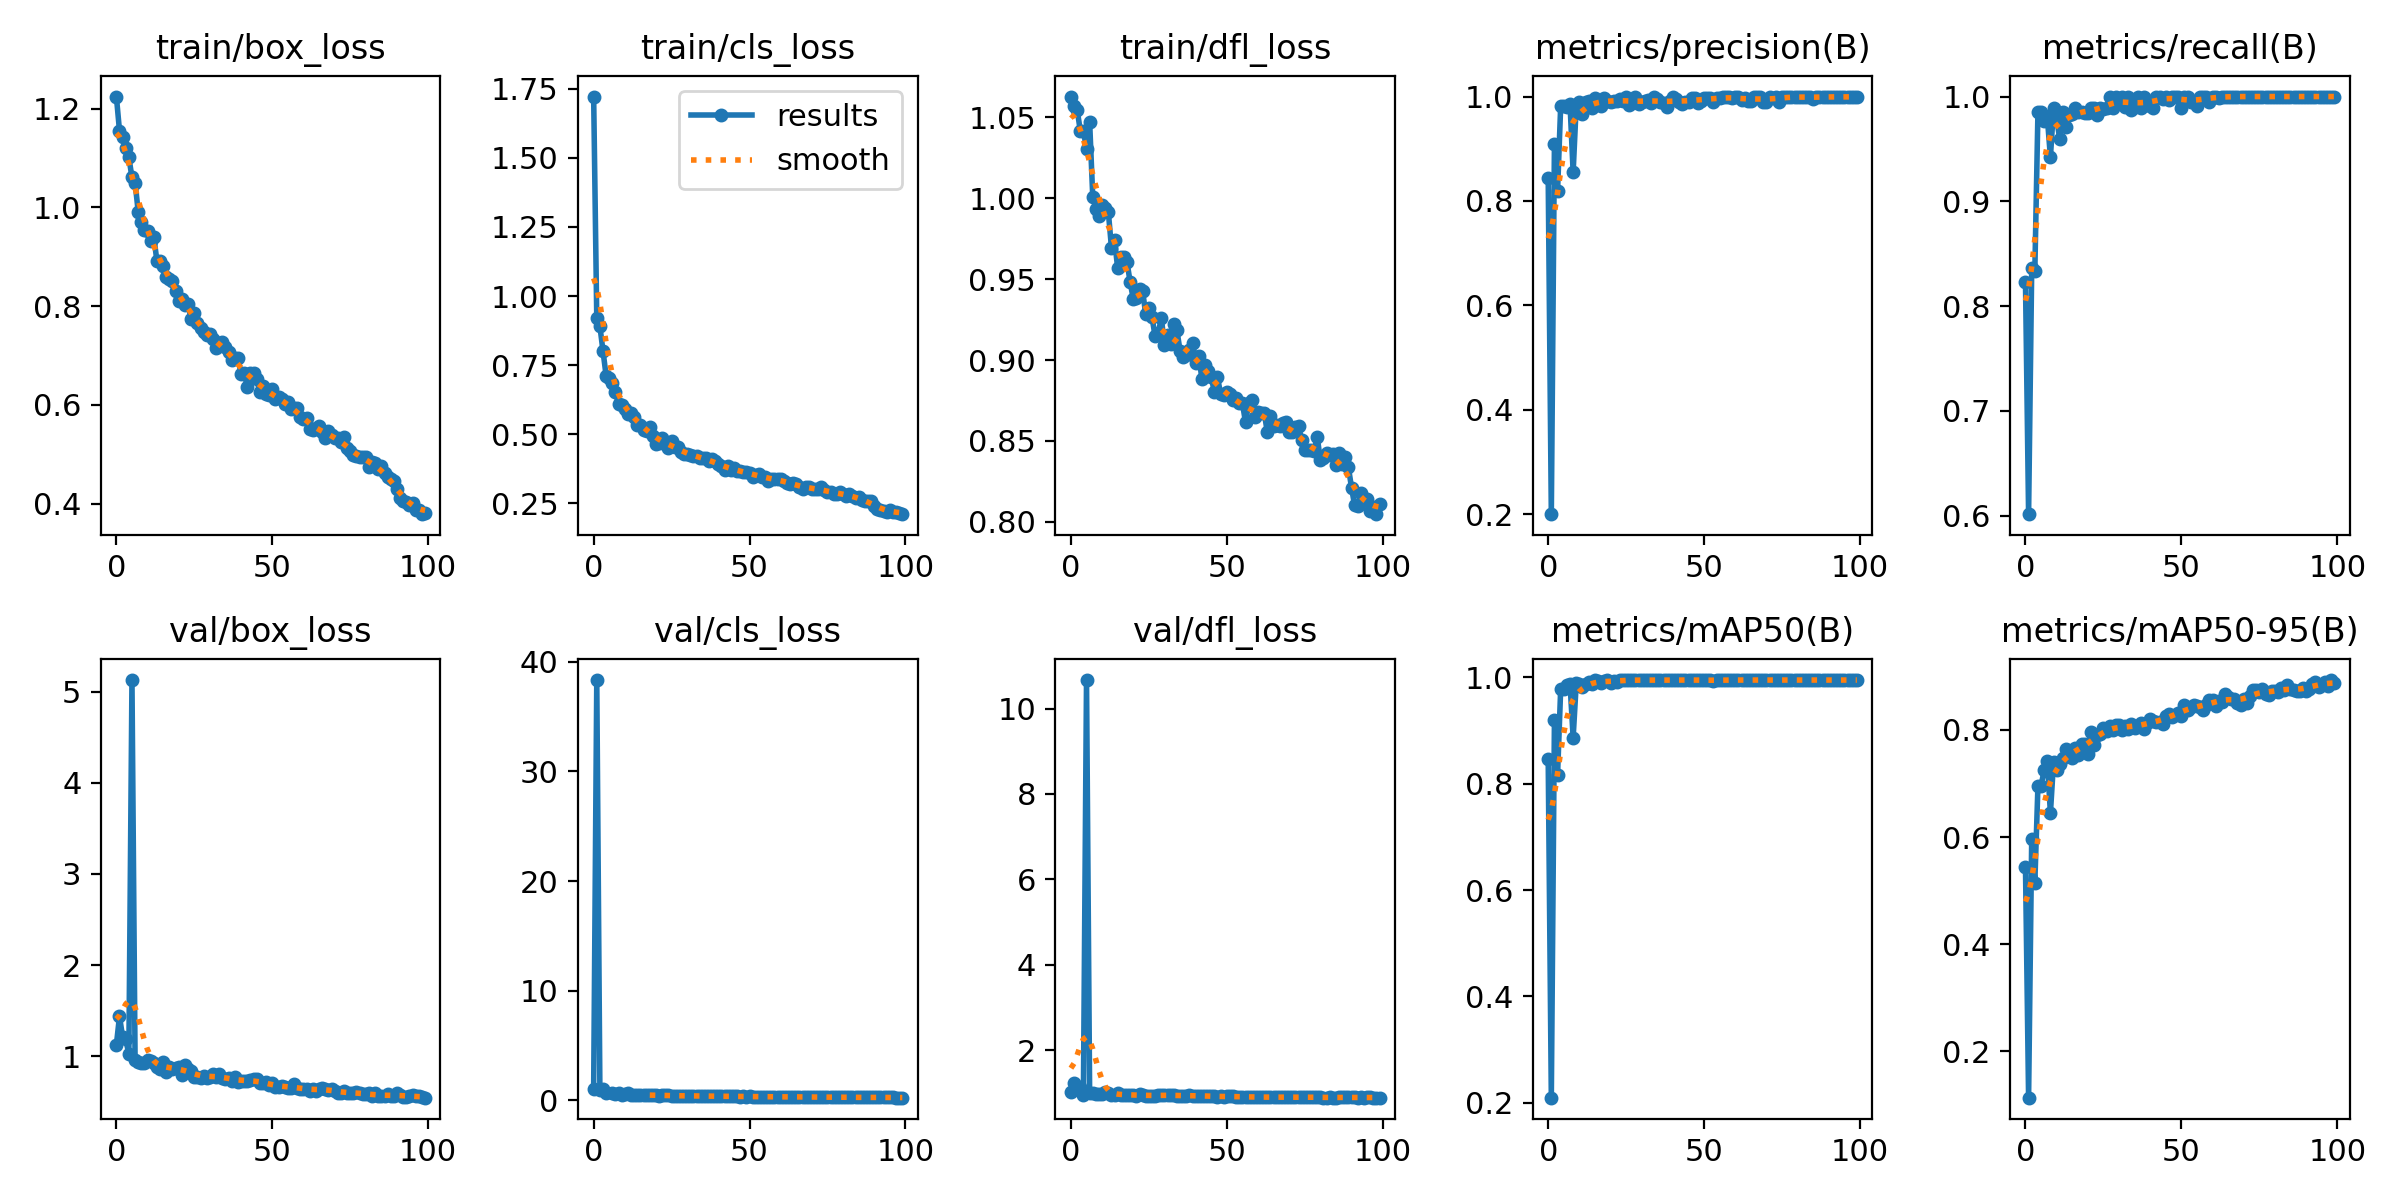

**Training graphs**(train/box_loss, train/cls_loss, train/dfl_loss) are all have significant downward trend suggesting that the model is getting better at predicting bound boxes, classifying the images and dealing with object that are challenging to differentiate.

The findings for the same metrics for **validation set** are similar but much more abrupt suggesting that the model initially struggles with unseen data but improves quickly and significantly meaning it generalizes well.

**Precision** measures the amount identified true positives out of identified true positives and false positives combined. Towards the end, precision is close to 1 meaning it doesn't make many mistakes(few false positives).

**Recall** measures the proportion of correctly identified true positives to all actual true positives and false negatives. Recall, just like precision quite quickly nears 1, meaning it can detect most of the objects after a few epochs.

**Mean average precision at IoU threshold 0.5** rises quite quickly and approaches 1 meaning the model performs very well in detecting objects with high precesion.

**Mean average precesion at multiple thresholds of IoU from 0.5 to 0.95** sees a quick rise followed by a steady climb to a 0.85. This is a stricter method and the results indicate the model is doing well generalizing across different IoU thresholds.

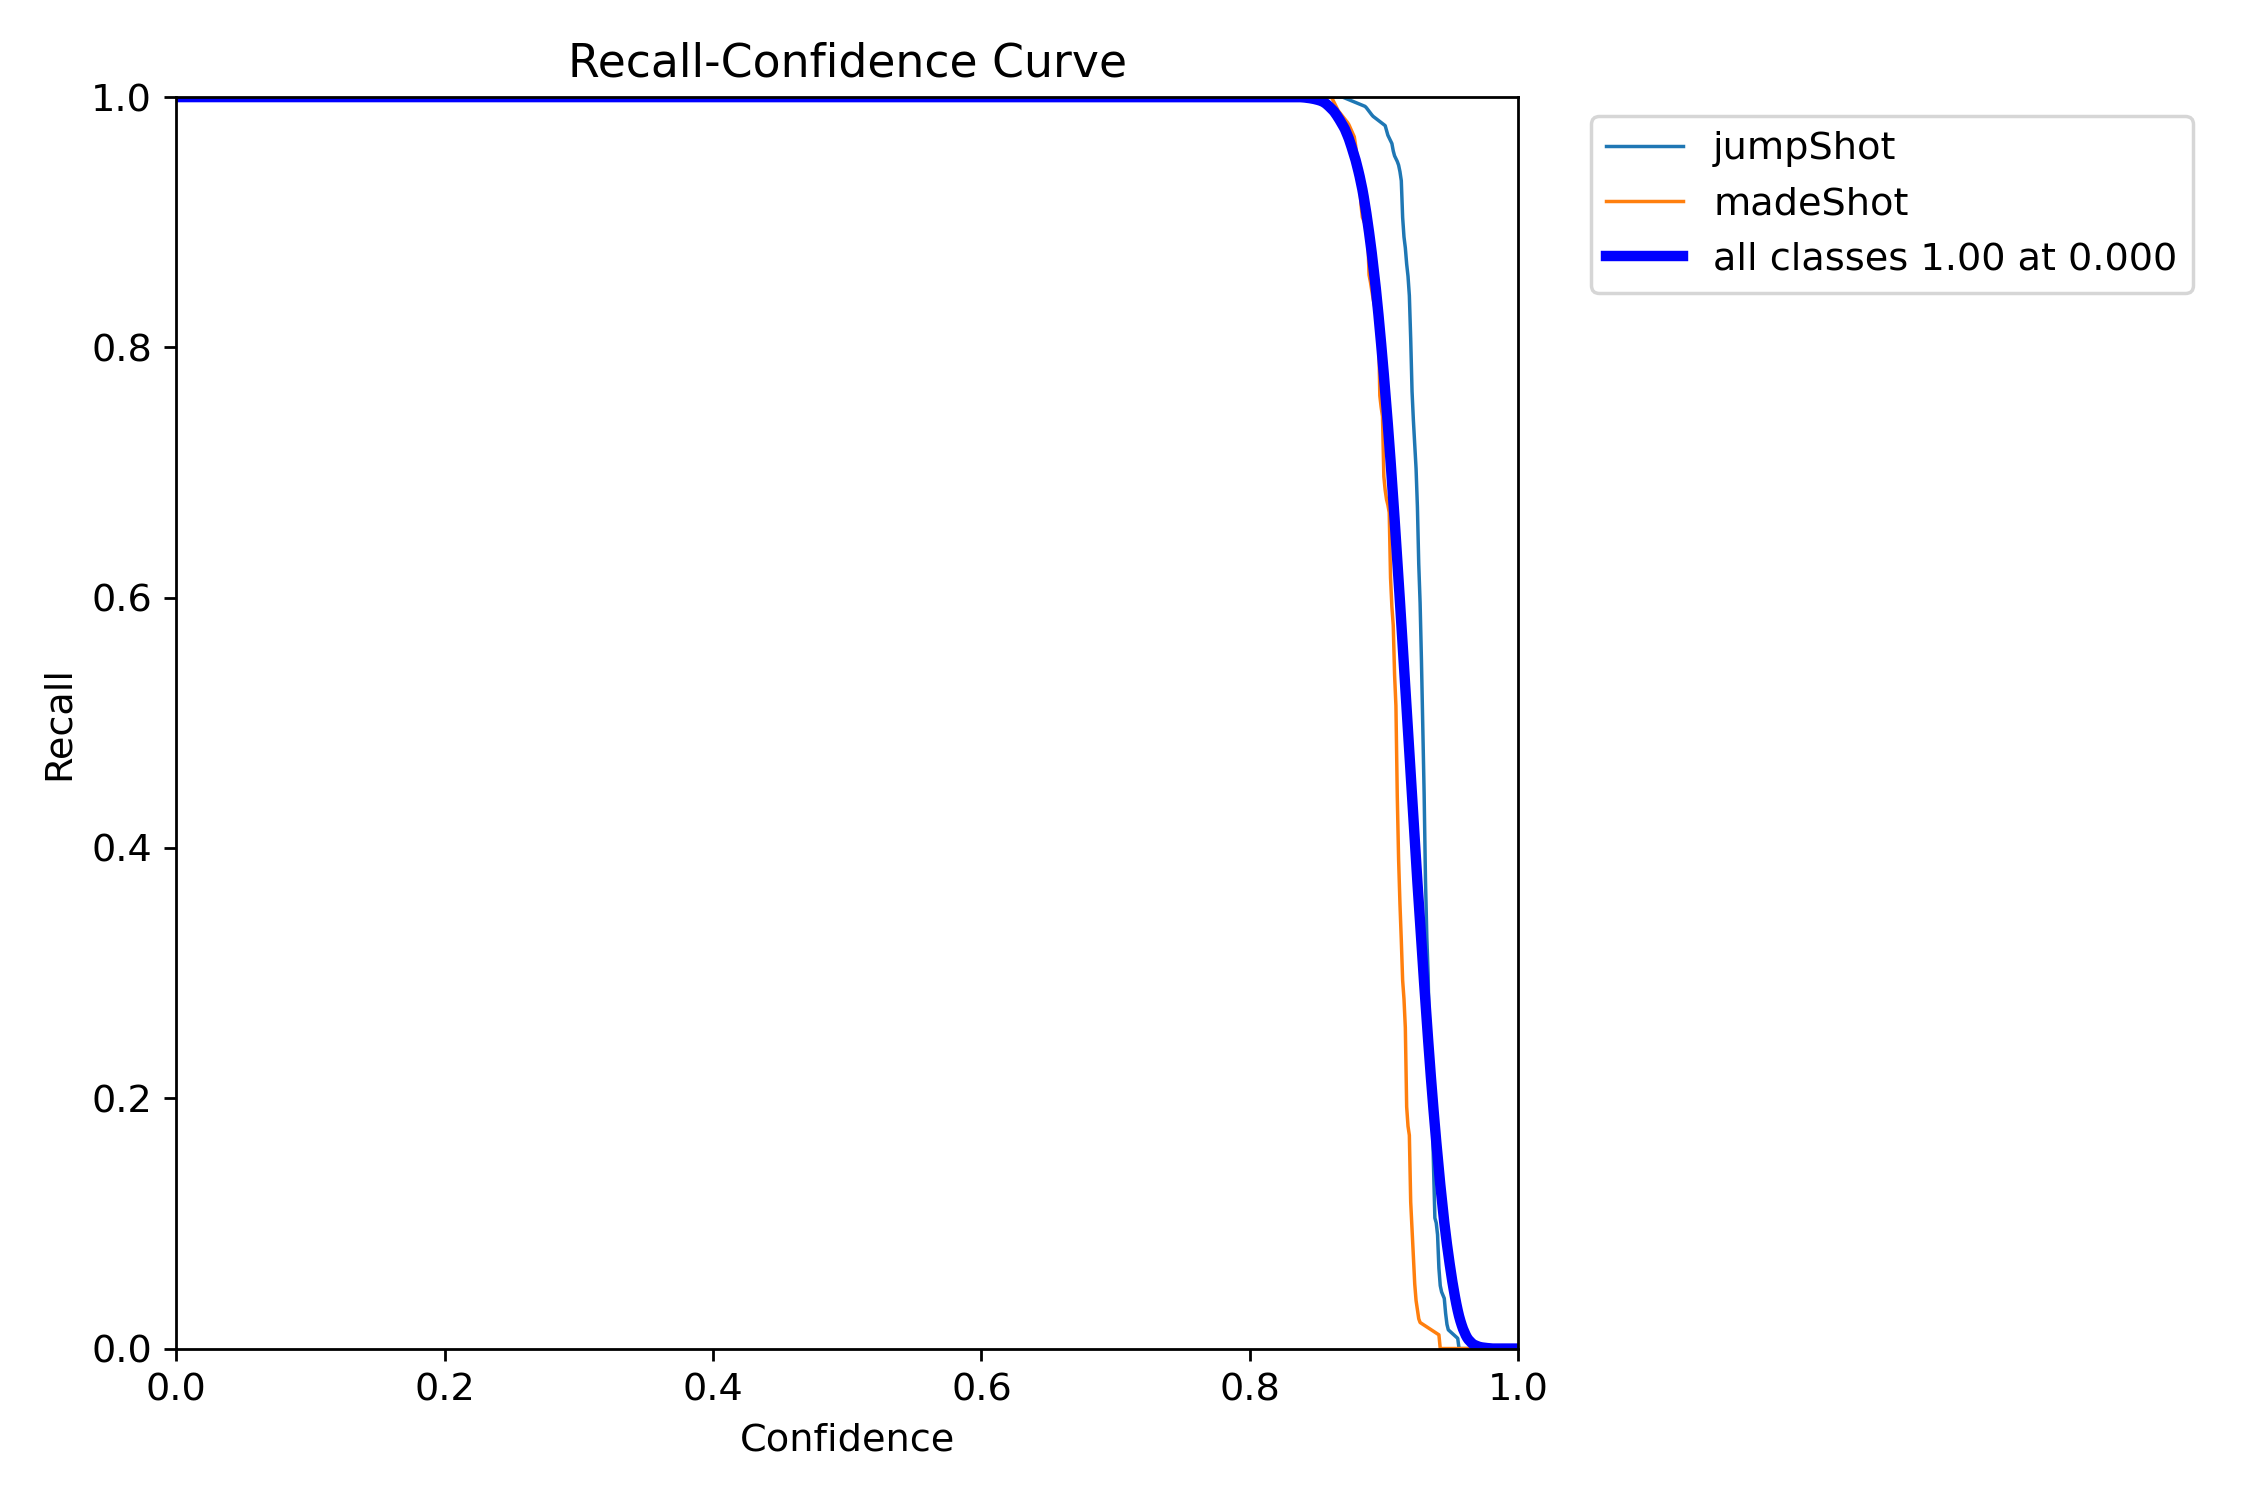

**The recall-confidence curve** suggests that the model will capture all true positives at a large range of confidence intervals. On the other hand it may also have many false positives.

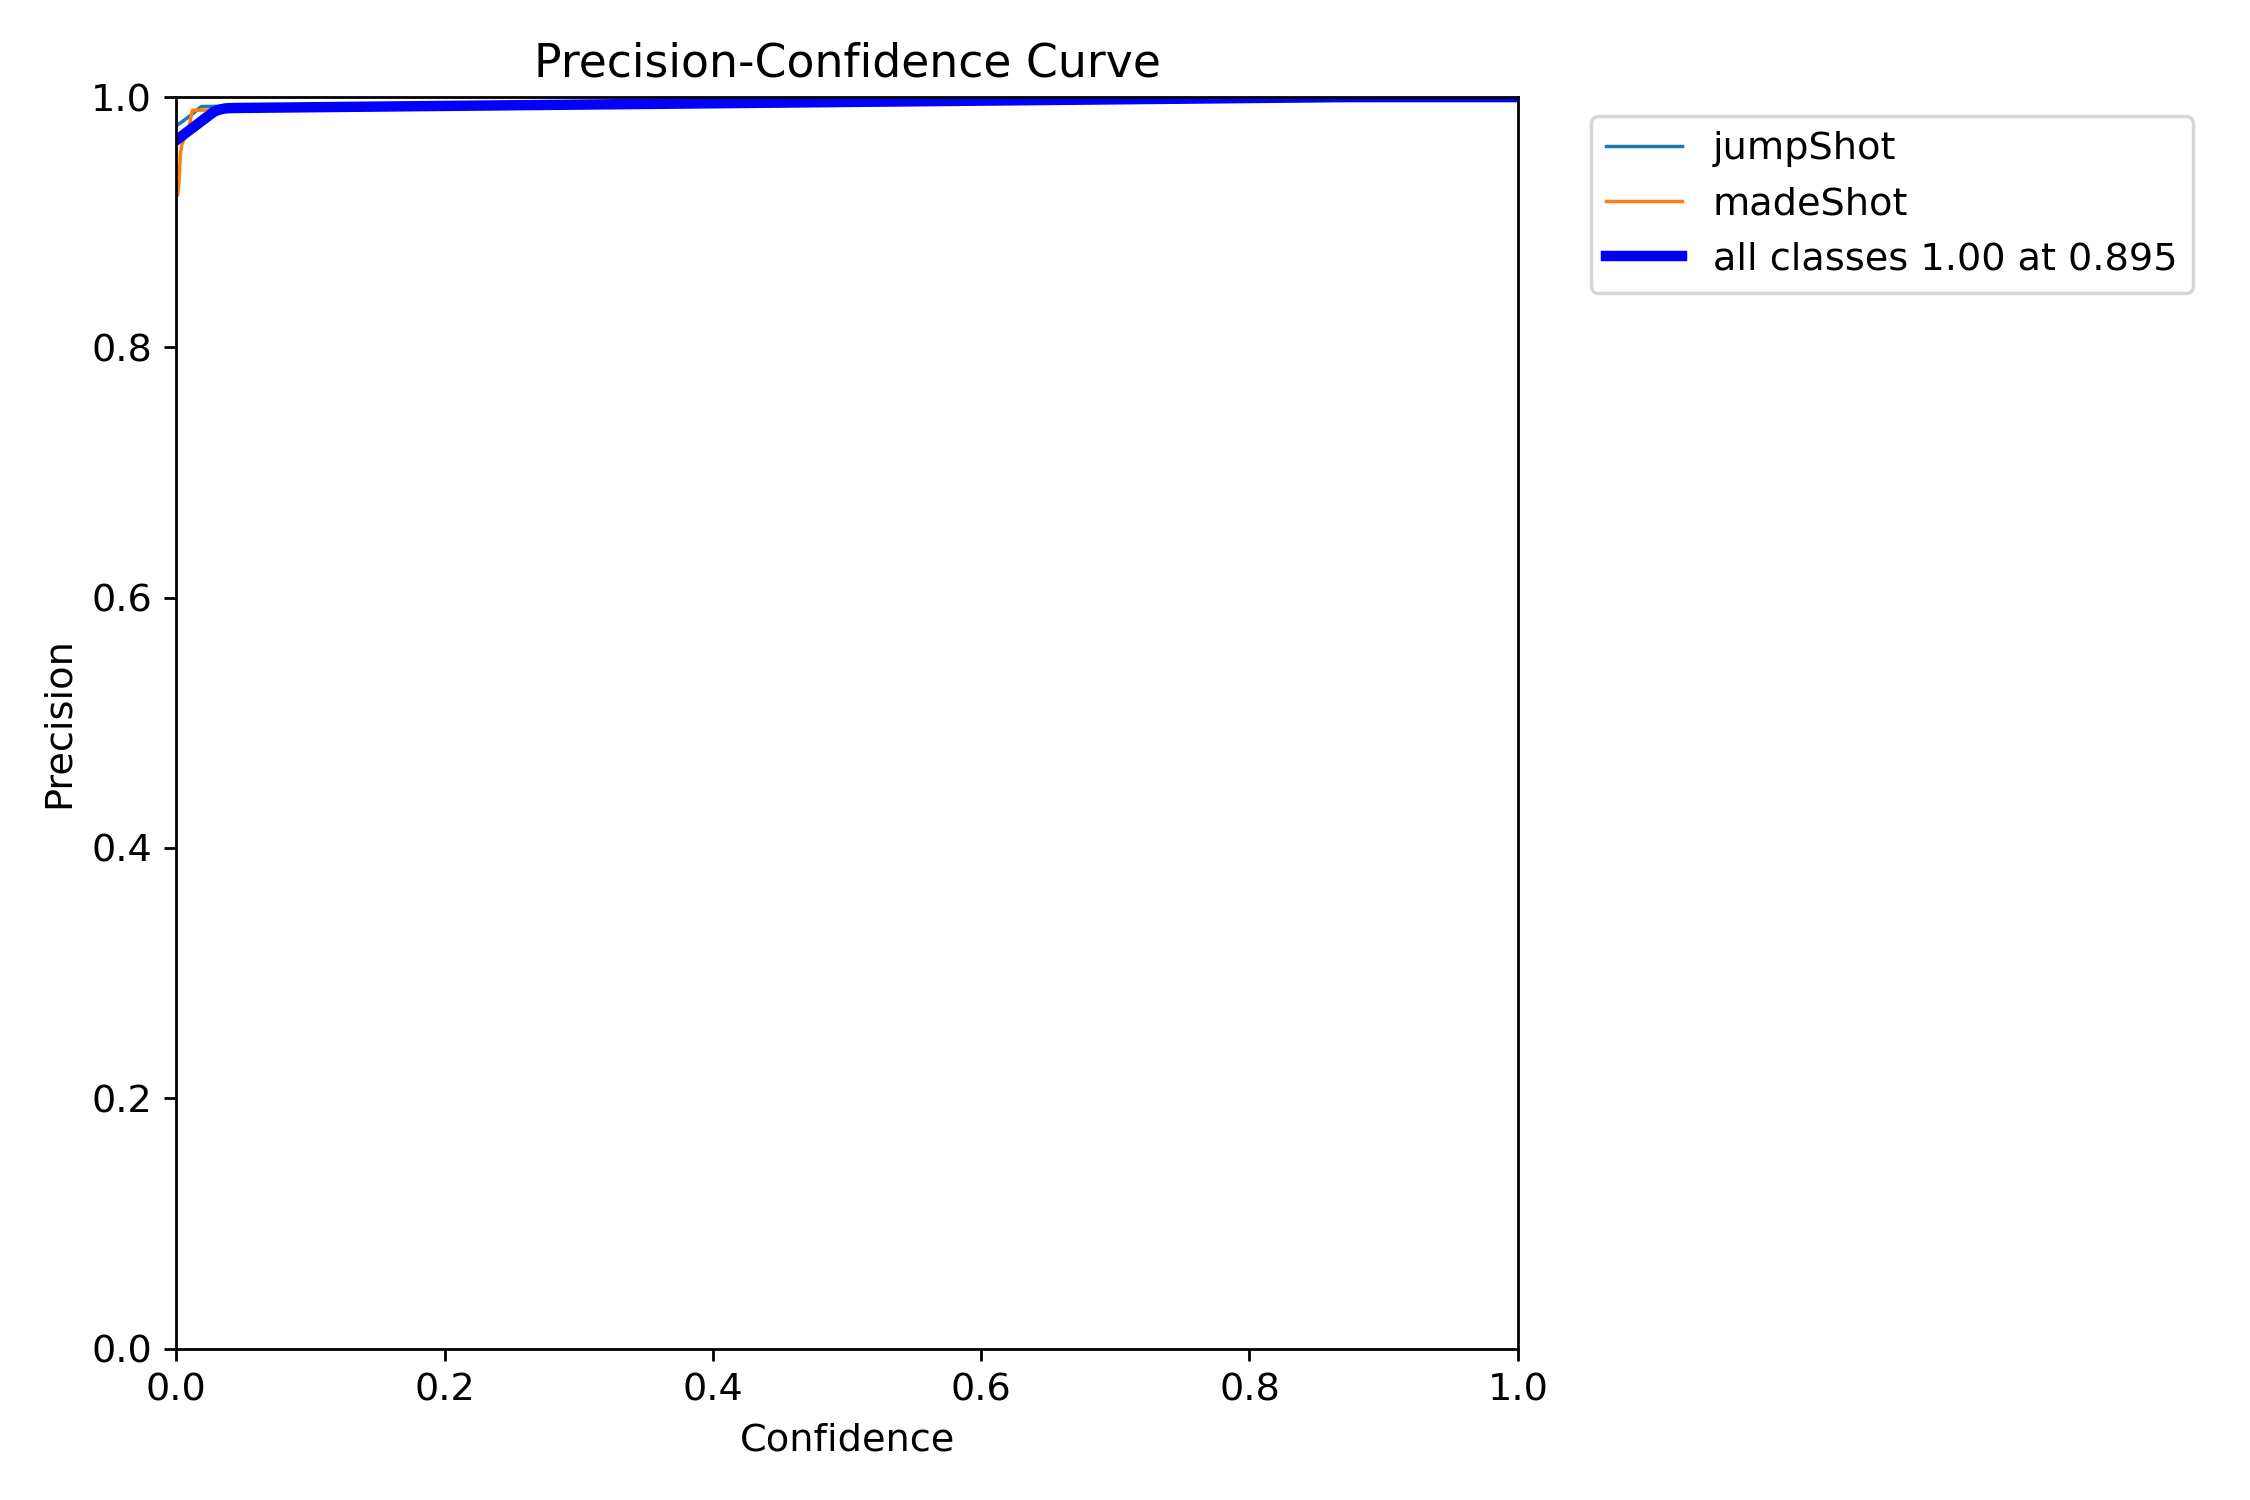

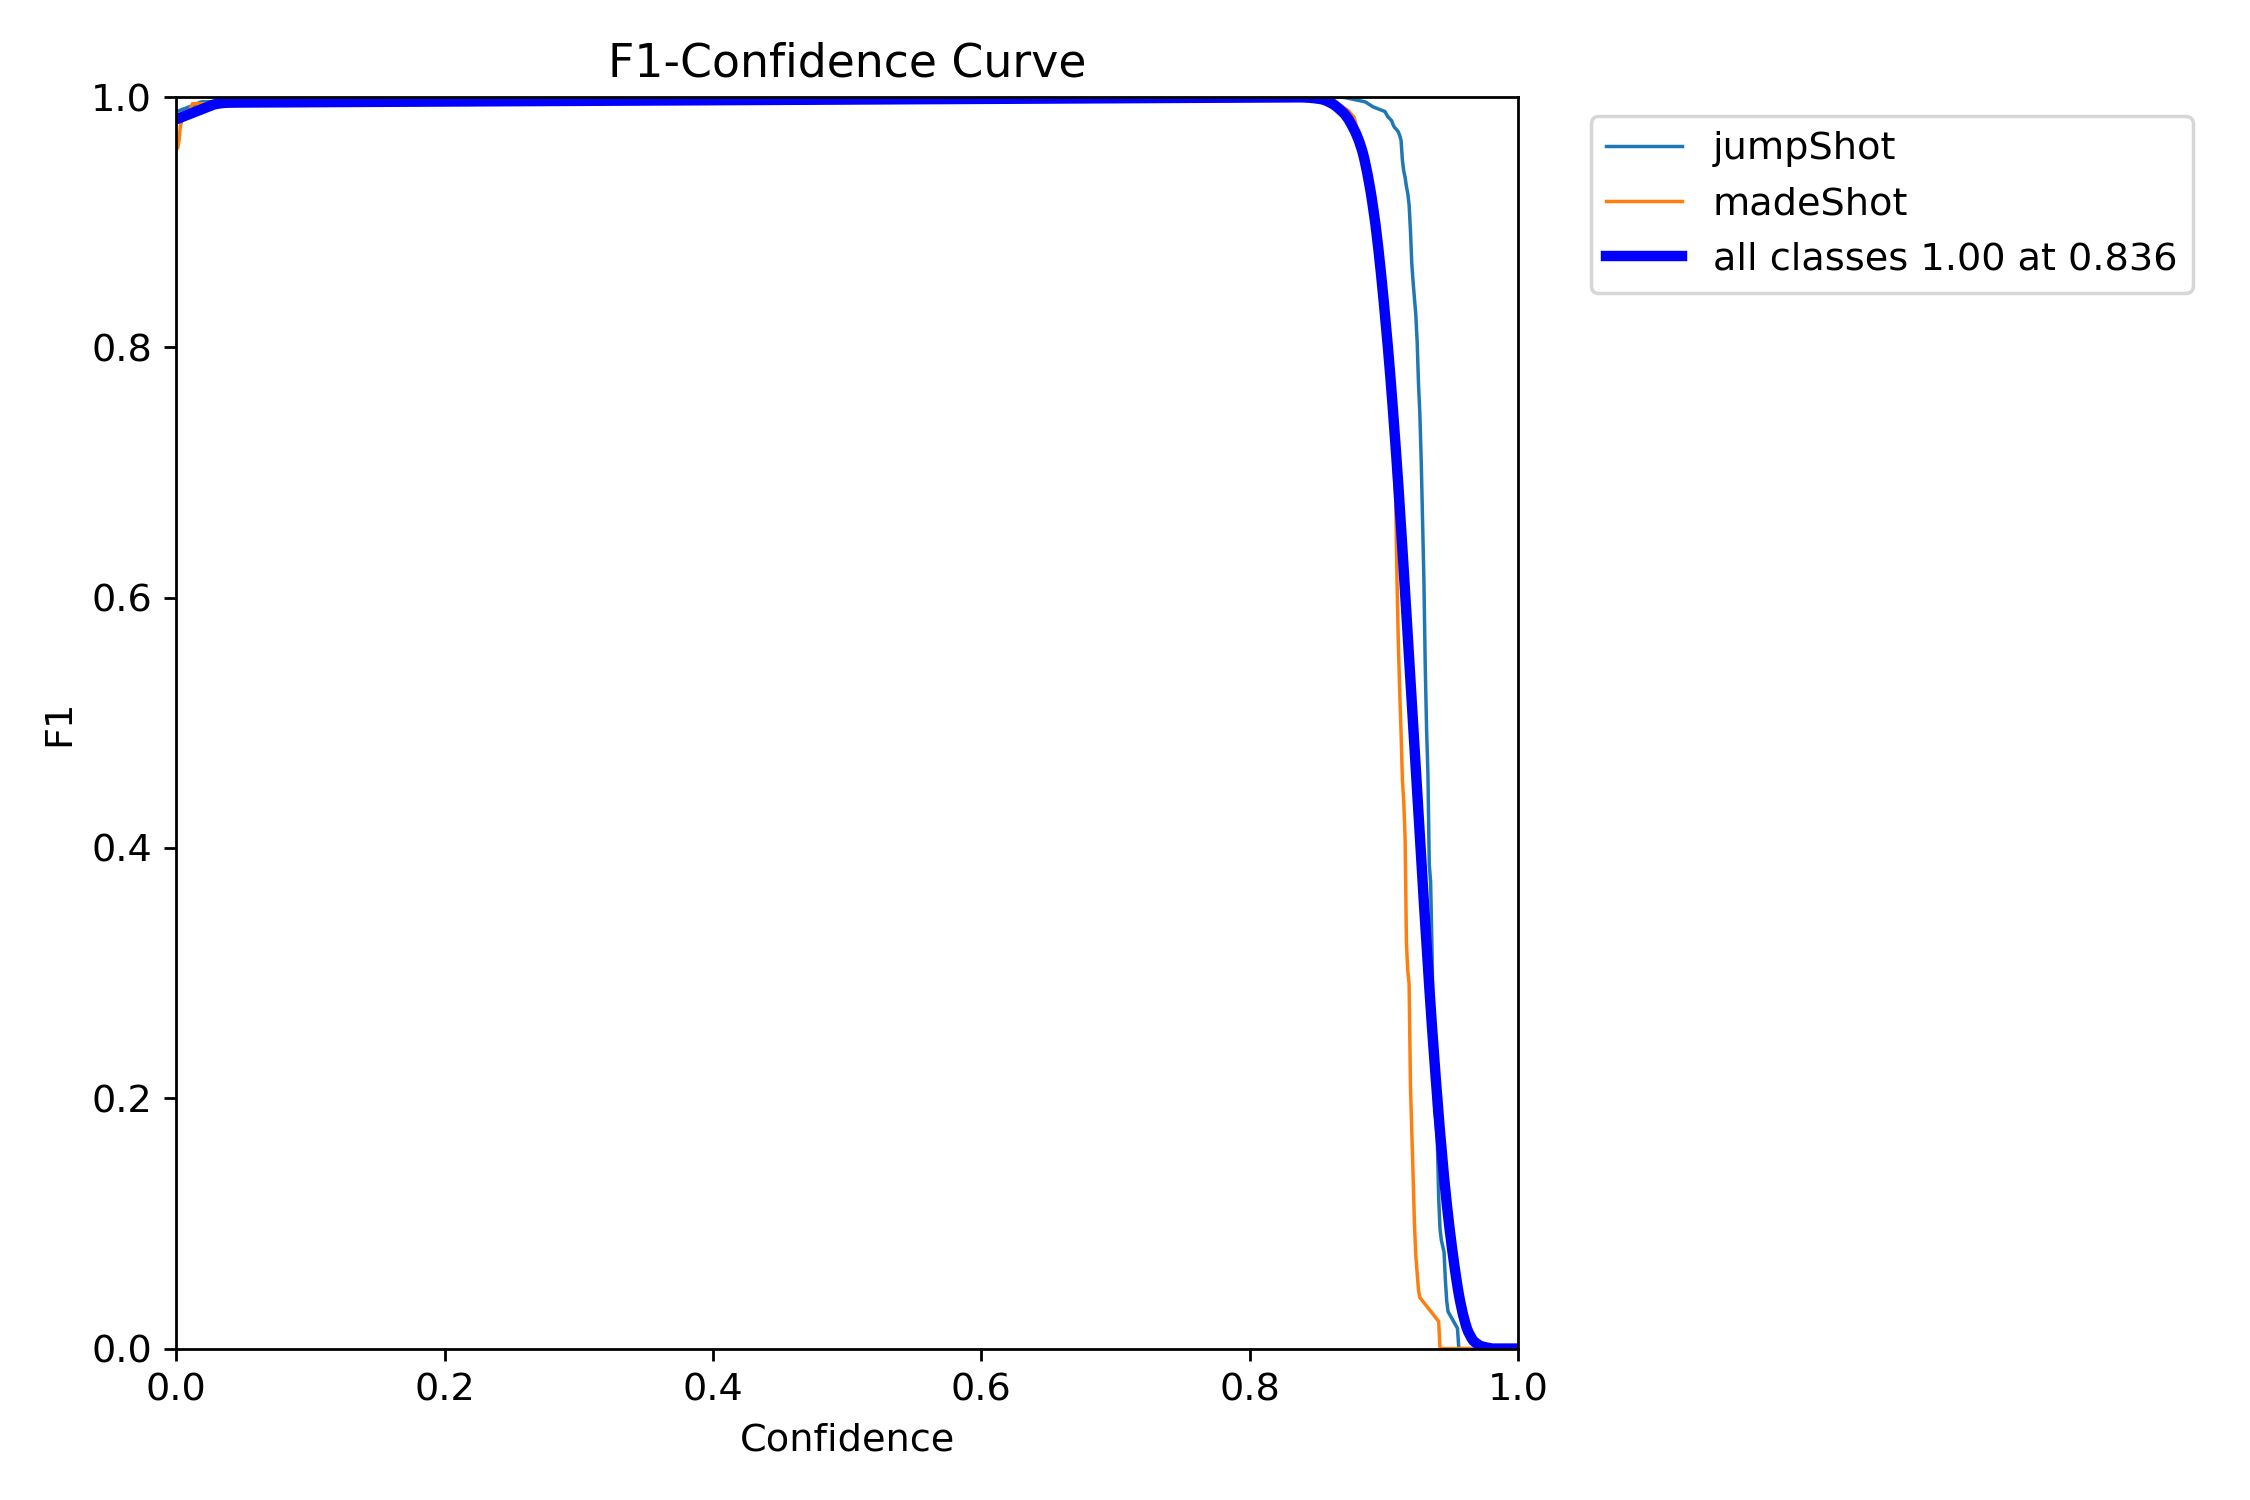

**F1-Confidence Curve **suggest that the model is consistently making correct predictions at almost any confidence threshold up 0.836. It suggest that the model memorized the data it is tested on and there is a good chance of overfitting.

# Testing


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
model = YOLO('/content/drive/MyDrive/project_basket/results/run_3n/weights/best.pt')
video_path = '/content/drive/MyDrive/project_basket/test/made/HomeCourt_F9E9C4E8-4F4C-4351-9CA4-D9DEE81930AA.mov'
results = model.predict(video_path, stream=True, conf = 0.835)

In [ ]:
!pip install ultralytics
import os
import cv2
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
def process_videos_in_folder(folder_path, model_path, label):
    model = YOLO(model_path)

    for video_file in os.listdir(folder_path):
        if video_file.endswith(('.mov', '.mp4')):
            video_path = os.path.join(folder_path, video_file)

            cap = cv2.VideoCapture(video_path)

            if not cap.isOpened():
                print(f'Error: Could not open video {video_file}.')
                continue

            output_video_name = f'output_with_labels_{label}_{video_file}'
            output_video_path = os.path.join(folder_path, output_video_name)
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            fps = cap.get(cv2.CAP_PROP_FPS)
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                results = model.predict(frame, conf=0.835)

                for result in results:
                    for box in result.boxes:
                        x1, y1, x2, y2 = map(int, box.xyxy[0])
                        label = model.names[int(box.cls)]
                        conf = box.conf.item()

                        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                        label_text = f'{label}: {conf:.2f}'
                        cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                out.write(frame)

            cap.release()
            out.release()
            cv2.destroyAllWindows()


In [ ]:
folder_path = '/content/drive/MyDrive/project_basket/test/miss'
model_path = '/content/drive/MyDrive/project_basket/results/run_3n/weights/best.pt'
process_videos_in_folder(folder_path, model_path, "miss")


0: 384x640 (no detections), 1192.8ms
Speed: 30.9ms preprocess, 1192.8ms inference, 19.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1377.0ms
Speed: 10.0ms preprocess, 1377.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1348.9ms
Speed: 4.1ms preprocess, 1348.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1239.4ms
Speed: 3.9ms preprocess, 1239.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 864.4ms
Speed: 3.9ms preprocess, 864.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 860.8ms
Speed: 3.8ms preprocess, 860.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 861.0ms
Speed: 3.7ms preprocess, 861.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 864.2ms
Speed: 